In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [8]:
df = pd.read_csv("Iris.csv")
df.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [9]:
df.Species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [10]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [11]:
df.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [12]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [13]:
species_map = {'Iris-setosa' : 1, 'Iris-versicolor' : 2, 'Iris-virginica' : 3}
df['Species'] = df['Species'].map(species_map)

In [14]:
df.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,1
1,2,4.9,3.0,1.4,0.2,1
2,3,4.7,3.2,1.3,0.2,1
3,4,4.6,3.1,1.5,0.2,1
4,5,5.0,3.6,1.4,0.2,1
5,6,5.4,3.9,1.7,0.4,1
6,7,4.6,3.4,1.4,0.3,1
7,8,5.0,3.4,1.5,0.2,1
8,9,4.4,2.9,1.4,0.2,1
9,10,4.9,3.1,1.5,0.1,1


<Axes: xlabel='Species', ylabel='SepalLengthCm'>

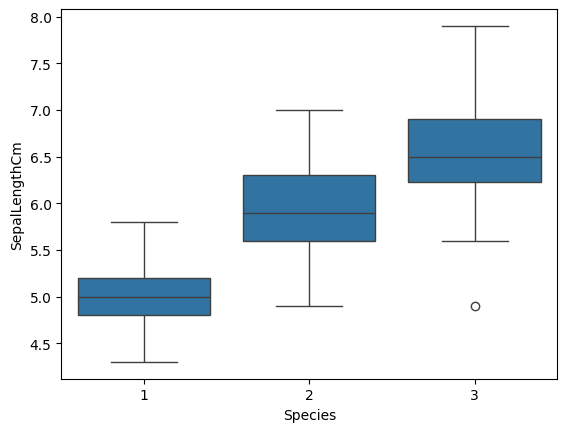

In [16]:
sns.boxplot(x='Species', y='SepalLengthCm', data=df)

In [17]:
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

    return df


In [18]:
df = remove_outliers(df, 'PetalLengthCm')

<Axes: xlabel='Species', ylabel='PetalLengthCm'>

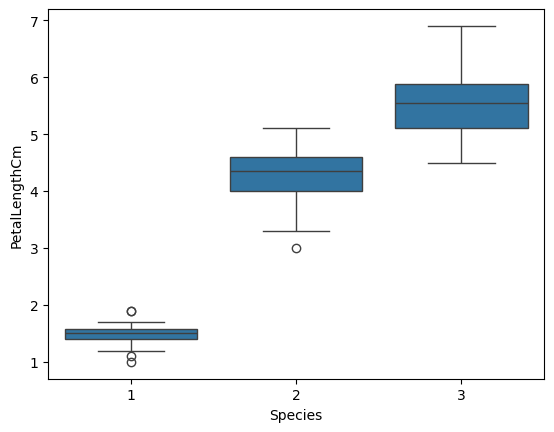

In [19]:
sns.boxplot(x='Species', y='PetalLengthCm', data=df)

In [20]:
df.groupby('Species')['PetalLengthCm'].agg(['mean', 'median', 'min', 'max', 'std']).reset_index()

,Species,mean,median,min,max,std
0,1,1.464,1.50,1.0,1.9,0.173511
1,2,4.260,4.35,3.0,5.1,0.469911
2,3,5.552,5.55,4.5,6.9,0.551895


In [24]:
mean = df[df['Species'] == 1].mean()
mean

Id               25.500
SepalLengthCm     5.006
SepalWidthCm      3.418
PetalLengthCm     1.464
PetalWidthCm      0.244
Species           1.000
dtype: float64

In [26]:
median = df[df['Species'] == 2].median()
median

Id               75.50
SepalLengthCm     5.90
SepalWidthCm      2.80
PetalLengthCm     4.35
PetalWidthCm      1.30
Species           2.00
dtype: float64